# American Option LSM Analysis

This notebook demonstrates:

1. **Exercise Boundary Visualization** using `plot_exercise_boundary` from `src.analytics`.  
2. **Monte Carlo Convergence** using `plot_convergence` from `src.analytics`.


In [1]:
# Ensure the project root is on the path so we can import src.*
import sys, os
root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root not in sys.path:
    sys.path.insert(0, root)


## Parameter Definitions

- **S0**: Initial underlying asset price at time \(t = 0\).  
- **K**: Option strike price (the fixed price at which the option can be exercised).  
- **r**: Annualized risk-free interest rate (continuously compounded).  
- **σ** (`sigma`): Annualized volatility of the underlying asset (standard deviation of log-returns).  
- **T**: Time to option maturity in years.  
- **n_steps**: Number of discrete time steps used in the Monte Carlo simulation (higher → finer granularity).  
- **n_paths**: Number of simulated price paths in the Monte Carlo engine (higher → more precise estimate).  
- **path_counts**: List of different `n_paths` values used to illustrate convergence behavior.  
- **option_type**: String flag—either `"put"` or `"call"`—indicating American put or call option.  
- **random_seed**: Seed for the random number generator to ensure reproducible simulations.  


In [2]:
# 1. Setup: imports and parameters
import numpy as np
from src.analytics import plot_exercise_boundary, plot_convergence

# Simulation parameters
S0 = 100.0       # initial stock price
K = 100.0        # strike price
r = 0.05         # risk-free rate
sigma = 0.2      # volatility
T = 1.0          # time to maturity (years)
n_steps = 50     # number of time steps
random_seed = 42


## Early-Exercise Boundary

Use the Longstaff–Schwartz regression approach to estimate and plot  
the optimal early-exercise boundary for an American **put**.


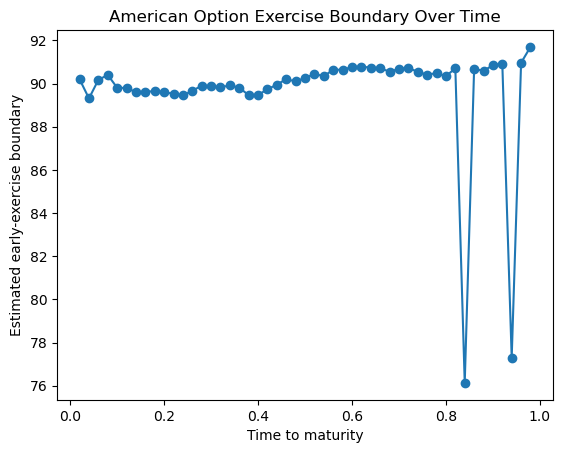

In [3]:
# Plot exercise boundary for a put option
plot_exercise_boundary(
    S0=S0,
    K=K,
    r=r,
    sigma=sigma,
    T=T,
    n_steps=n_steps,
    n_paths=20000,
    option_type="put",
    random_seed=random_seed
)


## Convergence Analysis

Plot the estimated option price versus number of simulation paths  
to illustrate Monte Carlo convergence.


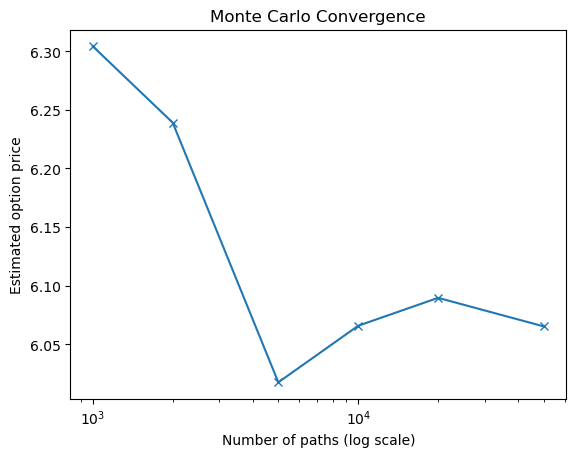

In [4]:
# Define path counts on a logarithmic scale
path_counts = [1_000, 2_000, 5_000, 10_000, 20_000, 50_000]

plot_convergence(
    S0=S0,
    K=K,
    r=r,
    sigma=sigma,
    T=T,
    n_steps=n_steps,
    path_counts=path_counts,
    option_type="put",
    random_seed=random_seed
)


*Feel free to adjust `sigma`, `r`, `K`, `n_paths` and other parameters above  
to explore different market scenarios and their impact on exercise strategy and convergence.*


## Interactive Parameter Tuning

Use sliders to tweak key inputs and see the exercise boundary & convergence update in real time.


In [5]:
# Imports for interactivity
import numpy as np
import matplotlib.pyplot as plt
from src.analytics import plot_exercise_boundary, plot_convergence
from ipywidgets import interact, FloatSlider, IntSlider

# Ensure plots render inline
%matplotlib inline


In [6]:
def interactive_boundary(
    S0, K, r, sigma, T, n_steps, n_paths
):
    plt.clf()  # clear previous figure
    plot_exercise_boundary(
        S0=S0, K=K, r=r, sigma=sigma,
        T=T, n_steps=n_steps, n_paths=n_paths,
        option_type="put", random_seed=42
    )

interact(
    interactive_boundary,
    S0=FloatSlider(min=50, max=150, step=5, value=100, description='S0'),
    K=FloatSlider(min=50, max=150, step=5, value=100, description='K'),
    r=FloatSlider(min=0.0, max=0.1, step=0.005, value=0.05, description='r'),
    sigma=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.2, description='σ'),
    T=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='T'),
    n_steps=IntSlider(min=10, max=100, step=10, value=50, description='steps'),
    n_paths=IntSlider(min=1000, max=50000, step=5000, value=20000, description='paths')
);


interactive(children=(FloatSlider(value=100.0, description='S0', max=150.0, min=50.0, step=5.0), FloatSlider(v…

In [8]:
def interactive_convergence(
    S0, K, r, sigma, T, n_steps
):
    plt.clf()
    # choose path counts based on slider
    path_counts = [1000, 2000, 5000, 10000, 20000, 50000]
    plot_convergence(
        S0=S0, K=K, r=r, sigma=sigma,
        T=T, n_steps=n_steps,
        path_counts=path_counts,
        option_type="put", random_seed=42
    )

interact(
    interactive_convergence,
    S0=FloatSlider(min=50, max=150, step=5, value=100, description='S0'),
    K=FloatSlider(min=50, max=150, step=5, value=100, description='K'),
    r=FloatSlider(min=0.0, max=0.1, step=0.005, value=0.05, description='r'),
    sigma=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.2, description='σ'),
    T=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='T'),
    n_steps=IntSlider(min=10, max=100, step=10, value=50, description='steps')
);

interactive(children=(FloatSlider(value=100.0, description='S0', max=150.0, min=50.0, step=5.0), FloatSlider(v…